# **Soal Praktikum Overfitting Handling #1**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang telah dibangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### Pengenalan tugas kegiatan 1

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

### 1. Initial process



* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

* Untuk selanjutnya pahami code dibawah dengan baik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS

In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

sample_data


In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"rizkyely","key":"5e34d0e39a9fdd843a0662ac9e5a61cd"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google dari kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [2]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 97% 297M/306M [00:03<00:00, 102MB/s]
100% 306M/306M [00:03<00:00, 80.3MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rockpaperscissors.zip  sample_data


In [3]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

 kaggle.json   README_rpc-cv-images.txt   rps-cv-images   scissors
 paper	       rock			  sample_data	 'Untitled Folder'


Buat folder baru bernama `dataset` dan memindahkan folder `paper, rock, scissors` kedalam folder `dataset`. Selanjutnya, lakukan splitting dataset menjadi 3 bagian `train, test, val` dan simpan ketiga folder tersebut diluar folder `dataset`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
%cd /content/

%cp -av scissors dataset

In [ ]:
%cp -av paper dataset
%cp -av rock dataset

In [6]:
pip install split-folders

In [7]:
import splitfolders

splitfolders.ratio("/content/rps-cv-images", output="/content/", seed= 1337, ratio =(.7,.2,.1), group_prefix=None)

Copying files: 2188 files [00:00, 3236.96 files/s]


In [9]:
import os

print('jumlah train : ', len(os.listdir('/content/train/rock')))
print('jumlah val : ', len(os.listdir('/content/val/rock')))
print('jumlah test : ', len(os.listdir('/content/test/rock')))

jumlah train :  508
jumlah val :  145
jumlah test :  73


### 2. Data Preprocessing

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit proses augmentasi sederhana. 

**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

Lakukan proses agumentasi sederhana pada dataset anda menggunakan `ImageDataGenerator` dengan ketentuan melakukan proses seperti berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.

In [10]:
import os

base_dir = '/content/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [11]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

test_rock = os.path.join(validation_dir, 'rock')
test_paper = os.path.join(validation_dir, 'paper')
test_scissors = os.path.join(validation_dir, 'scissors')

In [12]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        color_mode='rgb',
        shuffle='True',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150),
        color_mode='rgb',
        shuffle='False', 
        batch_size=32, 
        class_mode='categorical')
 
validation_generator = train_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150),
        color_mode='rgb',
        shuffle='True', 
        batch_size=32, 
        class_mode='categorical')

Found 1531 images belonging to 3 classes.
Found 220 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


### 3. Definisikan Model CNN

Bangun model CNN dan lakukan evaluasi sesuai kriteria **WAJIB** berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix
* Pastikan nilai akurasi model > 80%
* Mendefinisikan minimal 100 epoch untuk masing-masing model
* Melakukan prediksi minimal 15 gambar acak yang dapat mewakili seluruh kelas
* Menampilkan input gambar yang di prediksi beserta label hasil prediksi, nilai akurasi prediksi, dan lama waktu prediksi dalam sebuah plot. (15 gambar ditampilkan dalam 1 plot)
* Save model dalam file `json` dan simpan bobot dalam file `HDF5`
* Pastikan model anda dapat memprediksi unseen data dengan benar.

In [14]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow import keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'sigmoid')
])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\n\n Akurasi train dan validasi didapat telah mencapai nilai > 99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,)

Epoch 1/100
25/25 - 41s - loss: 0.9632 - accuracy: 0.6528 - val_loss: 1.1439 - val_accuracy: 0.3500 - 41s/epoch - 2s/step
Epoch 2/100
25/25 - 39s - loss: 0.3568 - accuracy: 0.8700 - val_loss: 1.1213 - val_accuracy: 0.3313 - 39s/epoch - 2s/step
Epoch 3/100
25/25 - 38s - loss: 0.2648 - accuracy: 0.9050 - val_loss: 0.9288 - val_accuracy: 0.5625 - 38s/epoch - 2s/step
Epoch 4/100
25/25 - 38s - loss: 0.2228 - accuracy: 0.9157 - val_loss: 0.9600 - val_accuracy: 0.6187 - 38s/epoch - 2s/step
Epoch 5/100
25/25 - 38s - loss: 0.1463 - accuracy: 0.9538 - val_loss: 0.7029 - val_accuracy: 0.6500 - 38s/epoch - 2s/step
Epoch 6/100
25/25 - 38s - loss: 0.1590 - accuracy: 0.9563 - val_loss: 1.6013 - val_accuracy: 0.3438 - 38s/epoch - 2s/step
Epoch 7/100
25/25 - 38s - loss: 0.0937 - accuracy: 0.9723 - val_loss: 0.5944 - val_accuracy: 0.7125 - 38s/epoch - 2s/step
Epoch 8/100
25/25 - 38s - loss: 0.0897 - accuracy: 0.9688 - val_loss: 2.0657 - val_accuracy: 0.2937 - 38s/epoch - 2s/step
Epoch 9/100
25/25 - 38s 

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

predictions = model.predict(validation_generator)

y_pred = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())   

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       paper       0.33      0.51      0.41       142
        rock       0.33      0.27      0.30       145
    scissors       0.36      0.25      0.29       150

    accuracy                           0.34       437
   macro avg       0.34      0.34      0.33       437
weighted avg       0.34      0.34      0.33       437



In [20]:
model.save('PrakML_6.h5')

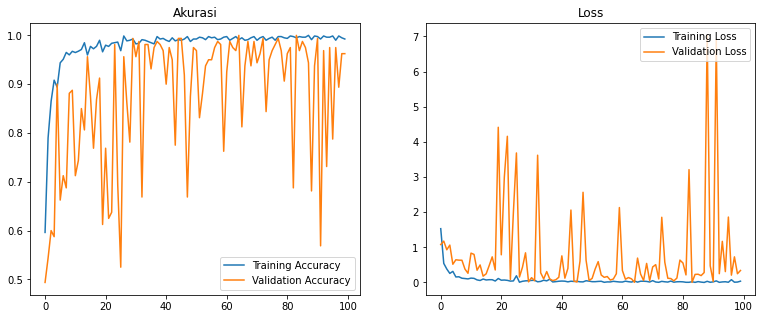

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
import numpy as np

ypred = model.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)

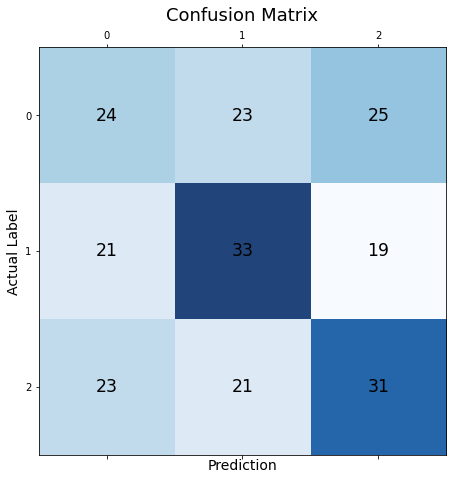

In [ ]:
results = confusion_matrix(test_generator.classes, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(results, cmap=plt.cm.Blues, alpha=0.9)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(x=j, y=i,s=results[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
model.save('model.h5')

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

